In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("image_data_complete_oldMLI.xlsx")

In [3]:
df.head()

,day,slide,subslide,tissue area fraction,r1,length of tissue (px),width of tissue (px),number_of_lumens,R_equiv,Rmidpoint,...,area of tissue se6,area of tissue se7,area of tissue se8,area of tissue se9,area of tissue se10,AN Tx,ID,Ventilation,MLI,MLI_edit pics
0,0,1,1,0.353572,34,43645,129.777248,6,39.743631,195.791943,...,83024.750,0.000,0.0,0.0,0.0,SAL,315,NV,32.232715,32.109248
1,0,1,2,0.305520,34,37543,130.366220,10,33.481917,157.654154,...,129481.125,126373.125,0.0,0.0,0.0,SAL,315,NV,32.232715,32.109248
2,0,1,3,0.414067,34,52854,125.501192,6,43.388849,211.587573,...,0.000,0.000,0.0,0.0,0.0,SAL,315,NV,32.232715,32.109248
3,0,1,4,0.381086,34,52793,115.638304,3,69.949062,204.957921,...,0.000,0.000,0.0,0.0,0.0,SAL,315,NV,32.232715,32.109248
4,0,1,5,0.367598,34,51599,114.126650,6,36.843577,201.110575,...,124475.875,0.000,0.0,0.0,0.0,SAL,315,NV,32.232715,32.109248


In [4]:
df.iloc[:,3:14].describe()

,tissue area fraction,r1,length of tissue (px),width of tissue (px),number_of_lumens,R_equiv,Rmidpoint,T_tilde,area of tissue (px^2),area of tissue se2,area of tissue se3
count,233.000000,233.0,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,2.330000e+02,2.330000e+02,2.330000e+02
mean,0.428174,34.0,55517.253219,124.060044,7.961373,44.901122,191.536497,25.206430,6.863348e+06,4.831525e+06,2.465157e+06
std,0.069169,0.0,8205.122597,13.043310,4.076136,25.918249,63.608706,19.085487,1.108285e+06,1.420400e+06,1.233746e+06
min,0.293869,34.0,34498.000000,95.225538,1.000000,16.334321,1.684088,4.003122,4.710989e+06,2.157830e+06,5.598081e+05
25%,0.383185,34.0,50687.000000,116.673227,5.000000,29.166551,196.438891,12.709751,6.142670e+06,3.901477e+06,1.699173e+06
50%,0.422167,34.0,55246.000000,123.169328,7.000000,39.316033,210.722865,19.633807,6.766995e+06,4.619788e+06,2.109136e+06
75%,0.461358,34.0,61872.000000,129.482714,10.000000,53.174605,221.818420,33.093365,7.395981e+06,5.627669e+06,2.972807e+06
max,0.688697,34.0,84453.000000,170.373591,23.000000,225.949633,275.560734,133.388298,1.103732e+07,9.649097e+06,7.246100e+06


In [76]:
# check what how many of each category we have
ANTx = df["AN Tx"].value_counts(sort=True, normalize=True)
print(ANTx)

SAL    0.527897
ETX    0.472103
Name: AN Tx, dtype: float64


In [77]:
Vent = df["Ventilation"].value_counts(sort=True, normalize=True)
print(Vent)

NV      0.291845
P20     0.278970
SAFE    0.257511
P24     0.171674
Name: Ventilation, dtype: float64


In [78]:
Day = df["day"].value_counts(sort=True, normalize=True)
print(Day)

7    0.515021
0    0.484979
Name: day, dtype: float64


In [81]:
df_stats = df.groupby(["day","AN Tx"])[["T_tilde", "R_equiv","MLI"]].agg([min, np.mean,np.median])
print(df_stats)

            T_tilde                          R_equiv                        \
                min       mean     median        min       mean     median   
day AN Tx                                                                    
0   ETX    6.395274  27.714826  19.607012  19.433413  49.569376  45.977688   
    SAL    4.003122  18.795710  12.787707  17.278249  39.171332  32.156881   
7   ETX    7.071705  28.973163  22.537732  16.334321  47.470770  42.480728   
    SAL    7.813812  26.080621  22.930186  20.670561  44.457541  40.304146   

                 MLI                        
                 min       mean     median  
day AN Tx                                   
0   ETX    18.361103  25.553680  23.909538  
    SAL    14.999442  29.269696  32.731915  
7   ETX    14.206968  22.951579  22.346922  
    SAL    17.928067  21.129327  20.311289  


In [86]:
df_stats_table = df.pivot_table(values =["T_tilde", "R_equiv","MLI"],index= "AN Tx",columns = "day",aggfunc=[np.mean, np.median])
print(df_stats_table)

            mean                                                         \
             MLI               R_equiv               T_tilde              
day            0          7          0          7          0          7   
AN Tx                                                                     
ETX    25.553680  22.951579  49.569376  47.470770  27.714826  28.973163   
SAL    29.269696  21.129327  39.171332  44.457541  18.795710  26.080621   

          median                                                         
             MLI               R_equiv               T_tilde             
day            0          7          0          7          0          7  
AN Tx                                                                    
ETX    23.909538  22.346922  45.977688  42.480728  19.607012  22.537732  
SAL    32.731915  20.311289  32.156881  40.304146  12.787707  22.930186  


In [90]:
# Index temperatures by treatment and Ventilation
df_ind = df.set_index(["AN Tx","Ventilation"])

# List of tuples
rows_to_keep = [("SAL","NV"), ("ETX", "P24")]

# Subset for rows to keep
print(df_ind.loc[rows_to_keep].info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 48 entries, ('SAL', 'NV') to ('ETX', 'P24')
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day                    48 non-null     int64  
 1   slide                  48 non-null     int64  
 2   subslide               48 non-null     int64  
 3   tissue area fraction   48 non-null     float64
 4   r1                     48 non-null     int64  
 5   length of tissue (px)  48 non-null     int64  
 6   width of tissue (px)   48 non-null     float64
 7   number_of_lumens       48 non-null     int64  
 8   R_equiv                48 non-null     float64
 9   Rmidpoint              48 non-null     float64
 10  T_tilde                48 non-null     float64
 11  area of tissue (px^2)  48 non-null     float64
 12  area of tissue se2     48 non-null     float64
 13  area of tissue se3     48 non-null     float64
 14  area of tissue se4     48 non-null  

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df["T_tilde"].values.reshape(-1, 1) 
y = df["AN Tx"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42, stratify=y)

In [7]:
from sklearn.ensemble import RandomForestClassifier


In [8]:
# Create an instance of the classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

# Train the classifier
classifier = classifier.fit(X_train , y_train)

In [9]:
print("Let's look at the classifier score: ", (classifier.score(X_test, y_test)))

Let's look at the classifier score:  0.6170212765957447


In [10]:
y_pred = classifier.predict(X_test)

new_df = pd.DataFrame()



In [24]:
# print(X_test.reshape(-1,1))
# indx = ['Row'+str(i) for i in range(1, len(X_test)-1)]
# indx = np.array(indx).reshape(-1,1)
# print(indx.shape)
# print(X_test.flatten().shape)
X_test = X_test.flatten()
# y_pred
dataset = pd.DataFrame({'T_tilde': X_test, 'AN Tx': y_pred})
# dfn = pd.DataFrame([X_test,y_pred], columns = ['Column_A','Column_B'])

# print(np.concatenate((X_test.flatten(), y_pred), axis=1))

In [25]:
# new_df['y_test'] = y_test.values new_df['X_test'] =

dataset.head()

,T_tilde,AN Tx
0,36.215598,ETX
1,16.678862,SAL
2,30.058854,SAL
3,33.197219,ETX
4,35.548048,ETX


AN Tx
ETX    AxesSubplot(0.125,0.125;0.775x0.755)
SAL    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

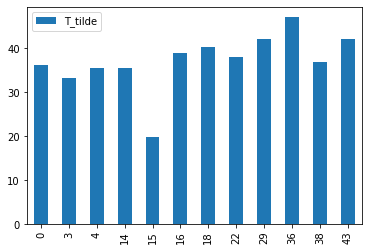

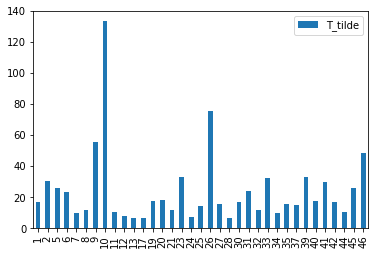

In [28]:
dataset.groupby('AN Tx').plot(kind = 'bar')

In [34]:
# dataset.groupby('AN Tx').plot.hist()
# dataset.plot.hist(by =["AN Tx"] )

AN Tx
ETX    AxesSubplot(0.125,0.125;0.62x0.755)
SAL    AxesSubplot(0.125,0.125;0.62x0.755)
dtype: object

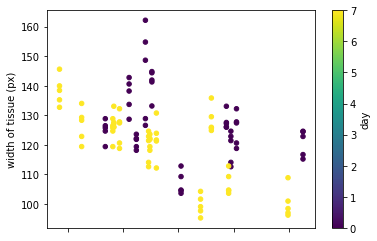

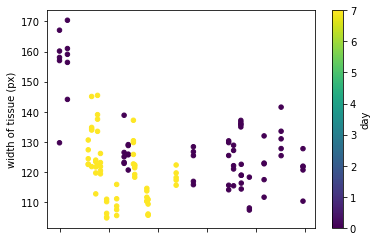

In [45]:
df.groupby(["AN Tx"]).plot("MLI","width of tissue (px)",c = 'day',cmap = 'viridis', kind = 'scatter')

 # Apply Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [52]:
linReg = LinearRegression()

X = df['MLI'].values.reshape(-1, 1)
y = df['width of tissue (px)']


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [55]:
linReg.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = linReg.predict(X_test)

In [73]:
# Compute the 5-fold cross-validation scores
cv_scores = cross_val_score(linReg,X,y, cv = 5)

In [74]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: -0.2972845018568161


In [60]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 13.051751213152231


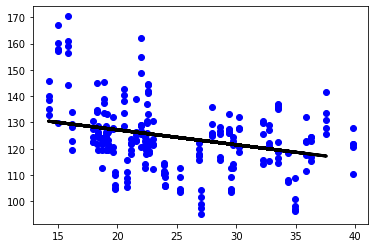

In [68]:
plt.plot(X_test, y_pred, color='black', linewidth=3)
plt.scatter(X, y, color='blue')
plt.show()